In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import GA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error as MSE

In [2]:
def spectra_from_conc(action, RED, GREEN, BLUE):
    """Transforms actions and input into output."""
    fract = normalize_to_fraction(action)
    return RED*fract[0] + GREEN*fract[1] + BLUE*fract[2]

def normalize_to_fraction(action):
    """Returns the fraction of total volume given the concentrations (action)."""
    total = np.sum(action)
    return action / total

class Environment(object):
    def __init__(self, target, RED, GREEN, BLUE):
        # in future this will be basis spectra
        self.target = target
        self.RED = RED
        self.GREEN = GREEN
        self.BLUE = BLUE
        self.metric = []
   
    def get_cos_sim(self, target, y):
        return np.average(cosine_similarity(target.reshape(1, -1), Y=y.reshape(1, -1)).squeeze())    
    
    def sample(self, action):
        # put functins in utils python file
        result = spectra_from_conc(action, self.RED, self.GREEN, self.BLUE)
        sim = self.get_cos_sim(self.target, result)
        mse = MSE(self.target, result)
        self.metric.append(mse)
        return -mse

In [3]:
sample_spectra = pd.read_excel('../../../data/Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
# spectra of base dyes
RED = sample_spectra[:,1]
GREEN = sample_spectra[:,2]
BLUE = sample_spectra[:,3]

target_conc = np.random.dirichlet((1, 1, 1), 1)[0]
target_spectra = spectra_from_conc(target_conc, RED, GREEN, BLUE)
env = Environment(target_spectra, RED, GREEN, BLUE)

batch_size = 20
generation_zero = np.random.dirichlet((1, 1, 1), batch_size)
epochs = 20
mutation_rate = 0.05
num_parents = batch_size//5

In [4]:
GA = GA.GA(env, batch_size, generation_zero, num_parents)
print(target_conc)

[0.00584833 0.83420248 0.1599492 ]


In [5]:
data = []
for i in range(epochs):
    data.append(GA.learn())

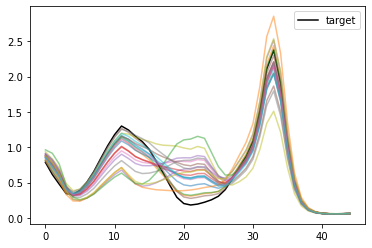

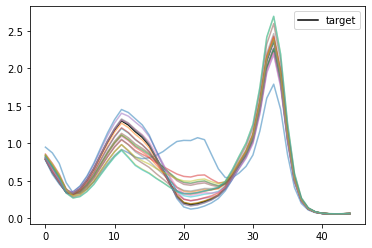

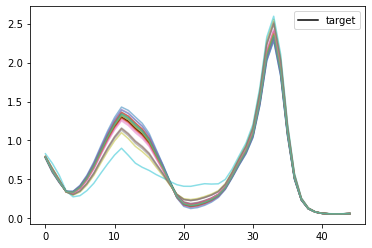

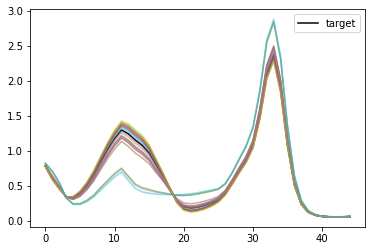

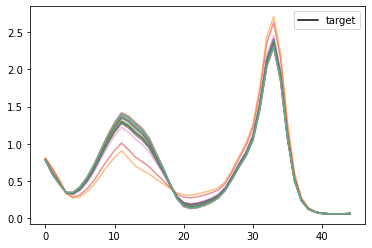

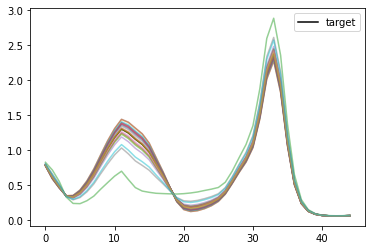

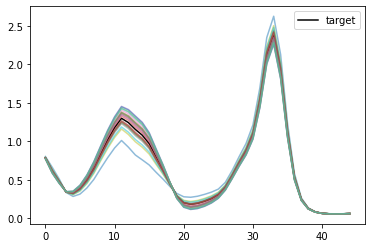

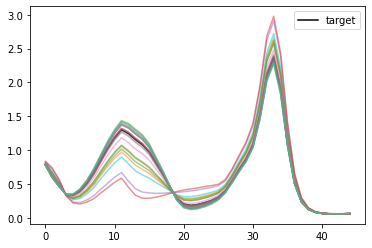

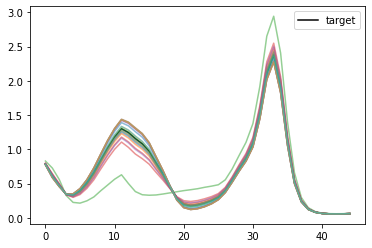

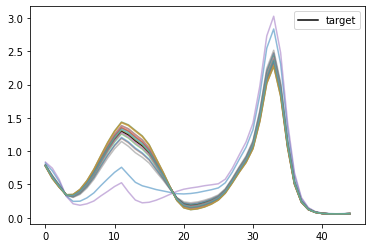

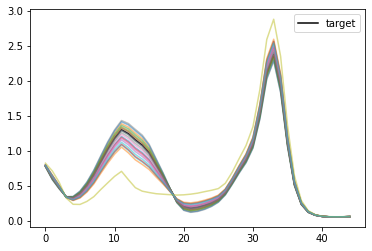

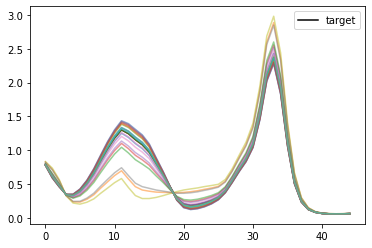

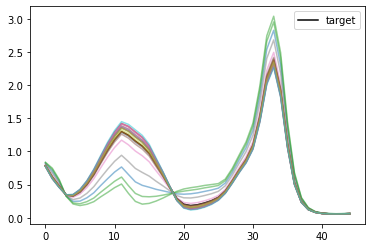

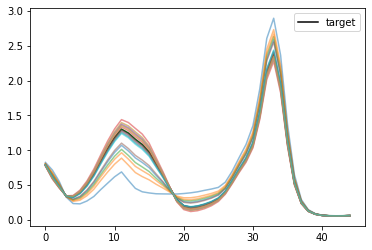

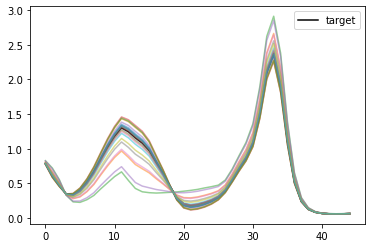

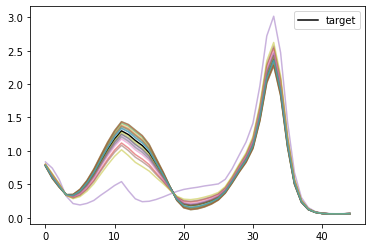

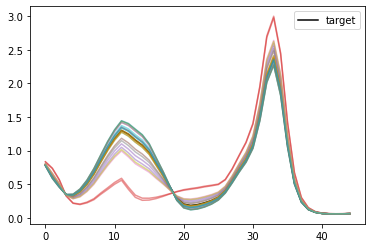

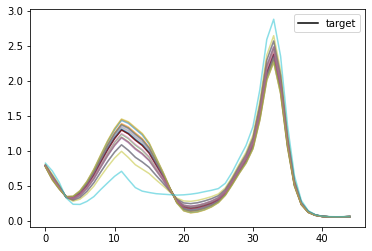

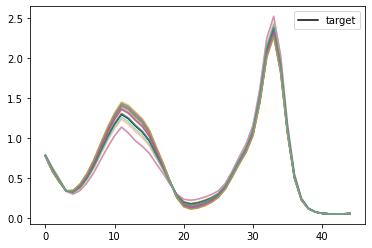

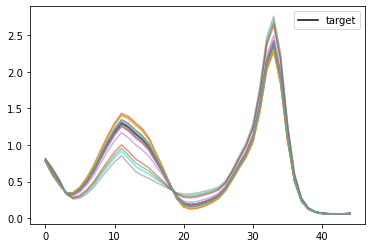

In [6]:
for epoch in data:
    plt.figure()
    plt.plot(target_spectra, color='black', label='target')
    for sol in epoch:
        spec = spectra_from_conc(sol, RED, GREEN, BLUE)
        plt.plot(spec, alpha=.5)
    plt.legend()

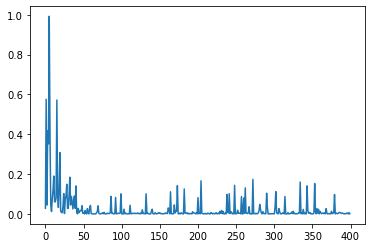

In [7]:
plt.plot(env.metric)